# Project description

You have server logs with data on Yandex.Afisha visits from June 2017 through May 2018
Dump file with all orders for the period
Marketing expenses statistics

**You are going to study**:
How people use the product
When they start to buy
How much money each customer brings
When they pay off

**Instructions for completing the project**
Step 1. Download the data and prepare it for analysis
Store the data on visits, orders, and expenses in variables. Optimize the data for analysis. Make sure each column contains the correct data type.
File paths:
/datasets/visits_log_us.csv. Download dataset
/datasets/orders_log_us.csv. Download dataset
/datasets/costs_us.csv. Download dataset

**Step 2. Make reports and calculate metrics:**
Product
How many people use it every day, week, and month?
How many sessions are there per day? (One user might have more than one session.)
What is the length of each session?
How often do users come back?
Sales
When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)

How many orders do they make during a given period of time?
What is the average purchase size?
How much money do they bring? (LTV)
Marketing
How much money was spent? Overall/per source/over time
How much did customer acquisition from each of the sources cost?
How worthwhile where the investments? (ROI)
Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.

**Step 3. Write a conclusion:** advise marketing experts how much money to invest and where.
What sources/platforms would you recommend? Back up your choice: what metrics did you focus on? Why? What conclusions did you draw after finding the metric values?
Format: Complete the task in Jupyter Notebook. Enter the code in code cells and text explanations in markdown cells. Apply formatting and headings.
Description of the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:


visits=pd.read_csv('/Users/edeng/Downloads/visits_log_us.csv', dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'])
orders=pd.read_csv('/Users/edeng/Downloads/orders_log_us.csv', parse_dates=['Buy Ts'])
costs=pd.read_csv('/Users/edeng/Downloads/costs_us.csv', parse_dates=['dt'])

print(visits.info())
print()
print(orders.info())
print()
costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 en

In [3]:
#fixing columns names
visits.columns=visits.columns.str.lower().str.replace(' ', '_')
orders.columns=orders.columns.str.lower().str.replace(' ', '_')
costs.columns=costs.columns.str.lower().str.replace(' ', '_')
#checking if the dates correspond with the project description
print(visits['end_ts'].describe())
print('----------------------------')
print(visits['start_ts'].describe())
#there are sessions that ended in 1st June 2018, we can remove them
visits=visits[~(visits.end_ts.astype('datetime64[M]')=='2018-06')]
orders=orders[~(orders.buy_ts.astype('datetime64[M]')=='2018-06')]
costs=costs[~(costs.dt.astype('datetime64[M]')=='2018-06')]


count                  359400
unique                 224760
top       2017-11-24 16:51:00
freq                       23
first     2017-06-01 00:02:00
last      2018-06-01 01:26:00
Name: end_ts, dtype: object
----------------------------


C:\Users\edeng\AppData\Local\Temp/ipykernel_8796/3527007525.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(visits['end_ts'].describe())
C:\Users\edeng\AppData\Local\Temp/ipykernel_8796/3527007525.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(visits['start_ts'].describe())


count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object


In [4]:
#checking categorial for misakes
visits.device.describe()
#checking Revenue data for mistakes and removing rows with revenue = zero values
orders=orders[orders.revenue!=0]
#checking costs data for mistakes
costs[costs.costs==0]

Empty DataFrame
Columns: [source_id, dt, costs]
Index: []

In [5]:
#checking for duplicates
visits[visits.duplicated()]
orders[orders.duplicated()]
costs[costs.duplicated()]
#no duplicates found

Empty DataFrame
Columns: [source_id, dt, costs]
Index: []

Dataframes were checked, columns name were fixed to lower case and removed spaces, dates which were outside of the study dates were removed from all dataframes, zero revenue rows were removed from the orders dataframe, and there are no duplicates.

## Product

### How many people use it every day, week, and month?

The average daily user engagment for touch device is: 252
The average daily user engagment for desktop device is: 659

The average weekly user engagment for touch device is: 1607
The average weekly user engagment for desktop device is: 4061

The average monthly user engagment for touch device is: 6825
The average monthly user engagment for desktop device is: 16724


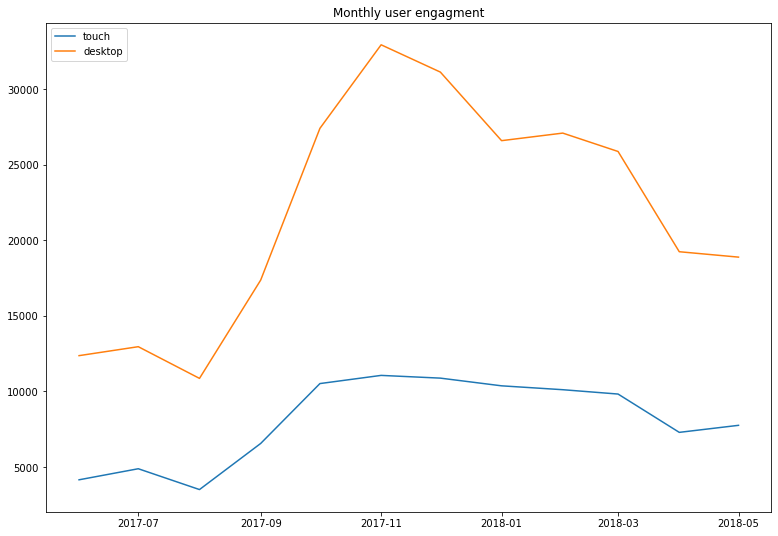

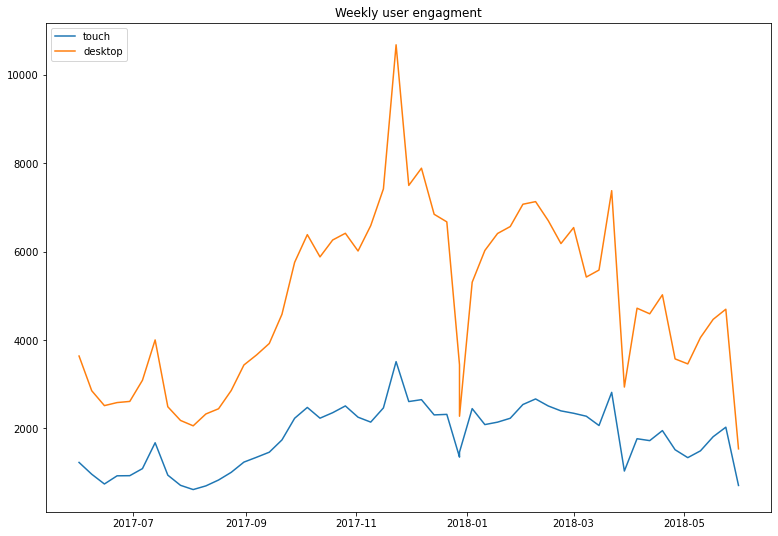

In [6]:
#creating year,month,day,date column
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week']  = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date

dau_total_touch = visits.where(visits['device']=='touch').groupby('session_date').agg({'uid': 'nunique'}).mean()
dau_total_desktop = visits.where(visits['device']=='desktop').groupby('session_date').agg({'uid': 'nunique'}).mean()

wau_total_touch = visits.where(visits['device']=='touch').groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
wau_total_desktop = visits.where(visits['device']=='desktop').groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()

mau_total_touch = visits.where(visits['device']=='touch').groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
mau_total_desktop = visits.where(visits['device']=='desktop').groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

print('The average daily user engagment for touch device is:', int(dau_total_touch))
print('The average daily user engagment for desktop device is:', int(dau_total_desktop))
print()
print('The average weekly user engagment for touch device is:', int(wau_total_touch))
print('The average weekly user engagment for desktop device is:', int(wau_total_desktop))
print()
print('The average monthly user engagment for touch device is:', int(mau_total_touch))
print('The average monthly user engagment for desktop device is:', int(mau_total_desktop))

#plotting Monthly user engagment
a=visits.where(visits['device']=='touch').groupby(['session_year', 'session_month']).agg({'uid': 'count'}).reset_index()
b=visits.where(visits['device']=='desktop').groupby(['session_year', 'session_month']).agg({'uid': 'count'}).reset_index()
fig, ax = plt.subplots(figsize=(13,9))
ax.plot(a.session_month, a.uid, label='touch')
ax.plot(b.session_month, b.uid, label='desktop')
ax.legend(loc="upper left")
ax.set_title('Monthly user engagment')
plt.show()

#plotting Weekly user engagment
a=visits.where(visits['device']=='touch').groupby(['session_year', 'session_week']).agg({'uid': 'count'}).reset_index()
b=visits.where(visits['device']=='desktop').groupby(['session_year', 'session_week']).agg({'uid': 'count'}).reset_index()
fig, ax = plt.subplots(figsize=(13,9))
ax.plot(a.session_week, a.uid, label='touch')
ax.plot(b.session_week, b.uid, label='desktop')
ax.legend(loc="upper left")
ax.set_title('Weekly user engagment')
plt.show()

We can see that desktop user engagment peaked at December 2017 but then started to decline quite rapidly, maybe a change in the website caused this? We can see the touch users engament also declined at the same time.

We can see that desktop devices are more popular among users.

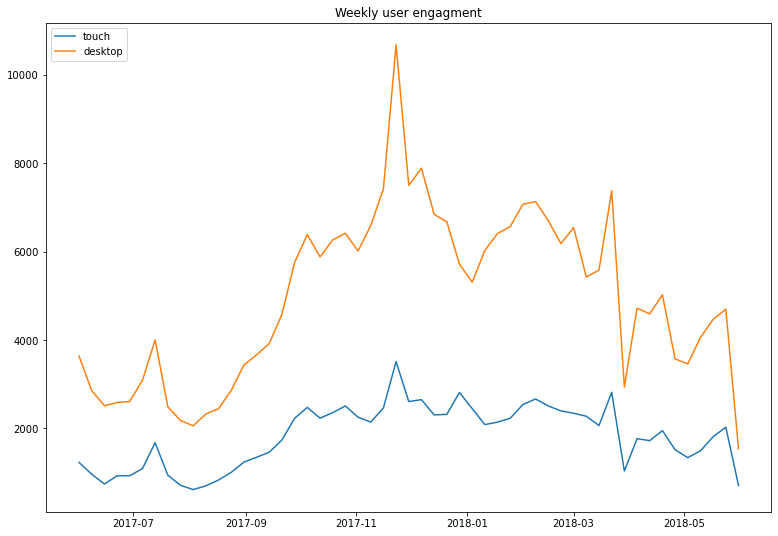

In [7]:
#plotting Weekly user engagment
a=visits.where(visits['device']=='touch').groupby(['session_week']).agg({'uid': 'count'}).reset_index()
b=visits.where(visits['device']=='desktop').groupby(['session_week']).agg({'uid': 'count'}).reset_index()
fig, ax = plt.subplots(figsize=(13,9))
ax.plot(a.session_week, a.uid, label='touch')
ax.plot(b.session_week, b.uid, label='desktop')
ax.legend(loc="upper left")
ax.set_title('Weekly user engagment')
plt.show()

### How many sessions are there per day?

The average number of sessions per day for touch device is: 266.7465564738292
The average number of sessions per day for desktop device is: 721.315934065934


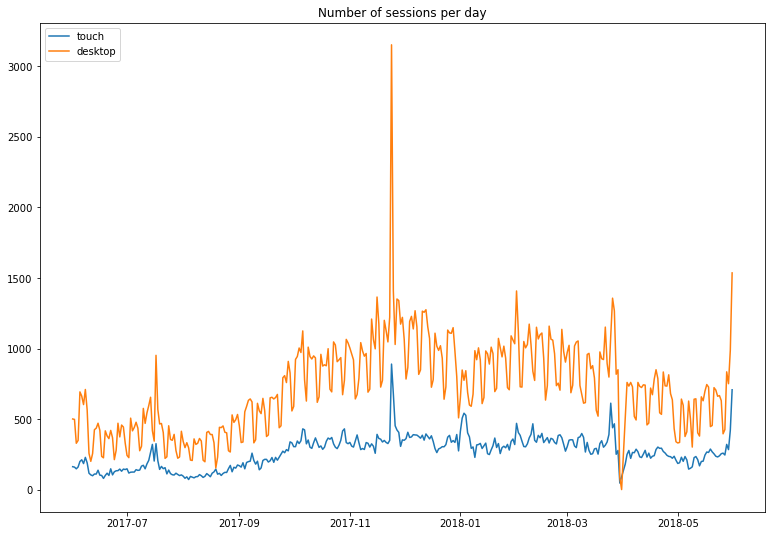

In [8]:
#calculating session per day for touch devices
sessions_per_user = visits.where(visits['device']=='touch').groupby(['session_date']).agg(
    {'uid': ['count', 'nunique']}
)
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
print('The average number of sessions per day for touch device is:',sessions_per_user['n_sessions'].mean())

fig, ax = plt.subplots(figsize=(13,9))
ax.plot(sessions_per_user['n_sessions'], label='touch')

#calculating session per day for desktop devices
sessions_per_user = visits.where(visits['device']=='desktop').groupby(['session_date']).agg(
    {'uid': ['count', 'nunique']}
)
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
print('The average number of sessions per day for desktop device is:',sessions_per_user['n_sessions'].mean())

ax.plot(sessions_per_user['n_sessions'], label='desktop')
ax.legend(loc="upper left")
ax.set_title('Number of sessions per day')
plt.show()


We can see that the number of session for desktop devices is more then double of that of touch users. We can also see that there was a day on November where users sessions peaked, we can look if there was an offer on that date.

### What is the length of each session?

averge length of each session for touch device users is 240.00000000000003 seconds


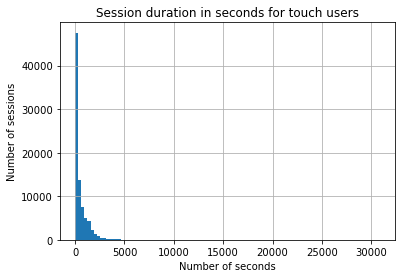

averge length of each session for desktop device users is 420.0 seconds


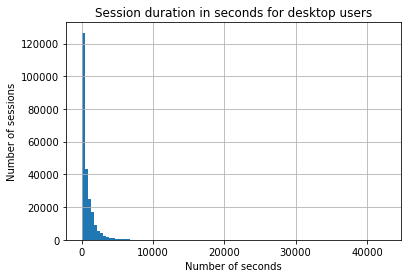

In [9]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
#as there a 2 values with negative session duration, I am removing them from the df
visits=visits[visits.session_duration_sec>0]
#printing touch users length seassion
visits.where(visits['device']=='touch')['session_duration_sec'].hist(bins=100)
print('averge length of each session for touch device users is {} seconds'.format(visits.where(visits['device']=='touch')['session_duration_sec'].median()))
plt.title('Session duration in seconds for touch users')
plt.xlabel('Number of seconds')
plt.ylabel('Number of sessions')
plt.show()

#printing desktop users length seassion
print('averge length of each session for desktop device users is {} seconds'.format(visits.where(visits['device']=='desktop')['session_duration_sec'].median()))
visits.where(visits['device']=='desktop')['session_duration_sec'].hist(bins=100)
plt.title('Session duration in seconds for desktop users')
plt.xlabel('Number of seconds')
plt.ylabel('Number of sessions')
plt.show()

We can see that the user average session length for desktop users is almost double then touch users. We can also see that desktop users short sessions are almost triple then the touch users. Maybe the desktop website is more likly to result in conversions?

In [10]:
# the reviewer's code:
(visits['end_ts'] - visits['start_ts']).dt.total_seconds().describe()

count    323592.000000
mean        714.126839
std        1026.293654
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       42660.000000
dtype: float64

### How often do users come back?

We will see the retention rate by week

In [11]:
#creating a df with min months of when the session started 
first_activity_date = visits.groupby(['uid'])['session_date'].min()
first_activity_date.name = 'first_activity_date'
#merging with original df
visits = visits.join(first_activity_date, on='uid')
visits['session_date'] = pd.to_datetime(visits['session_date'])
visits['first_activity_date'] = pd.to_datetime(visits['first_activity_date'])

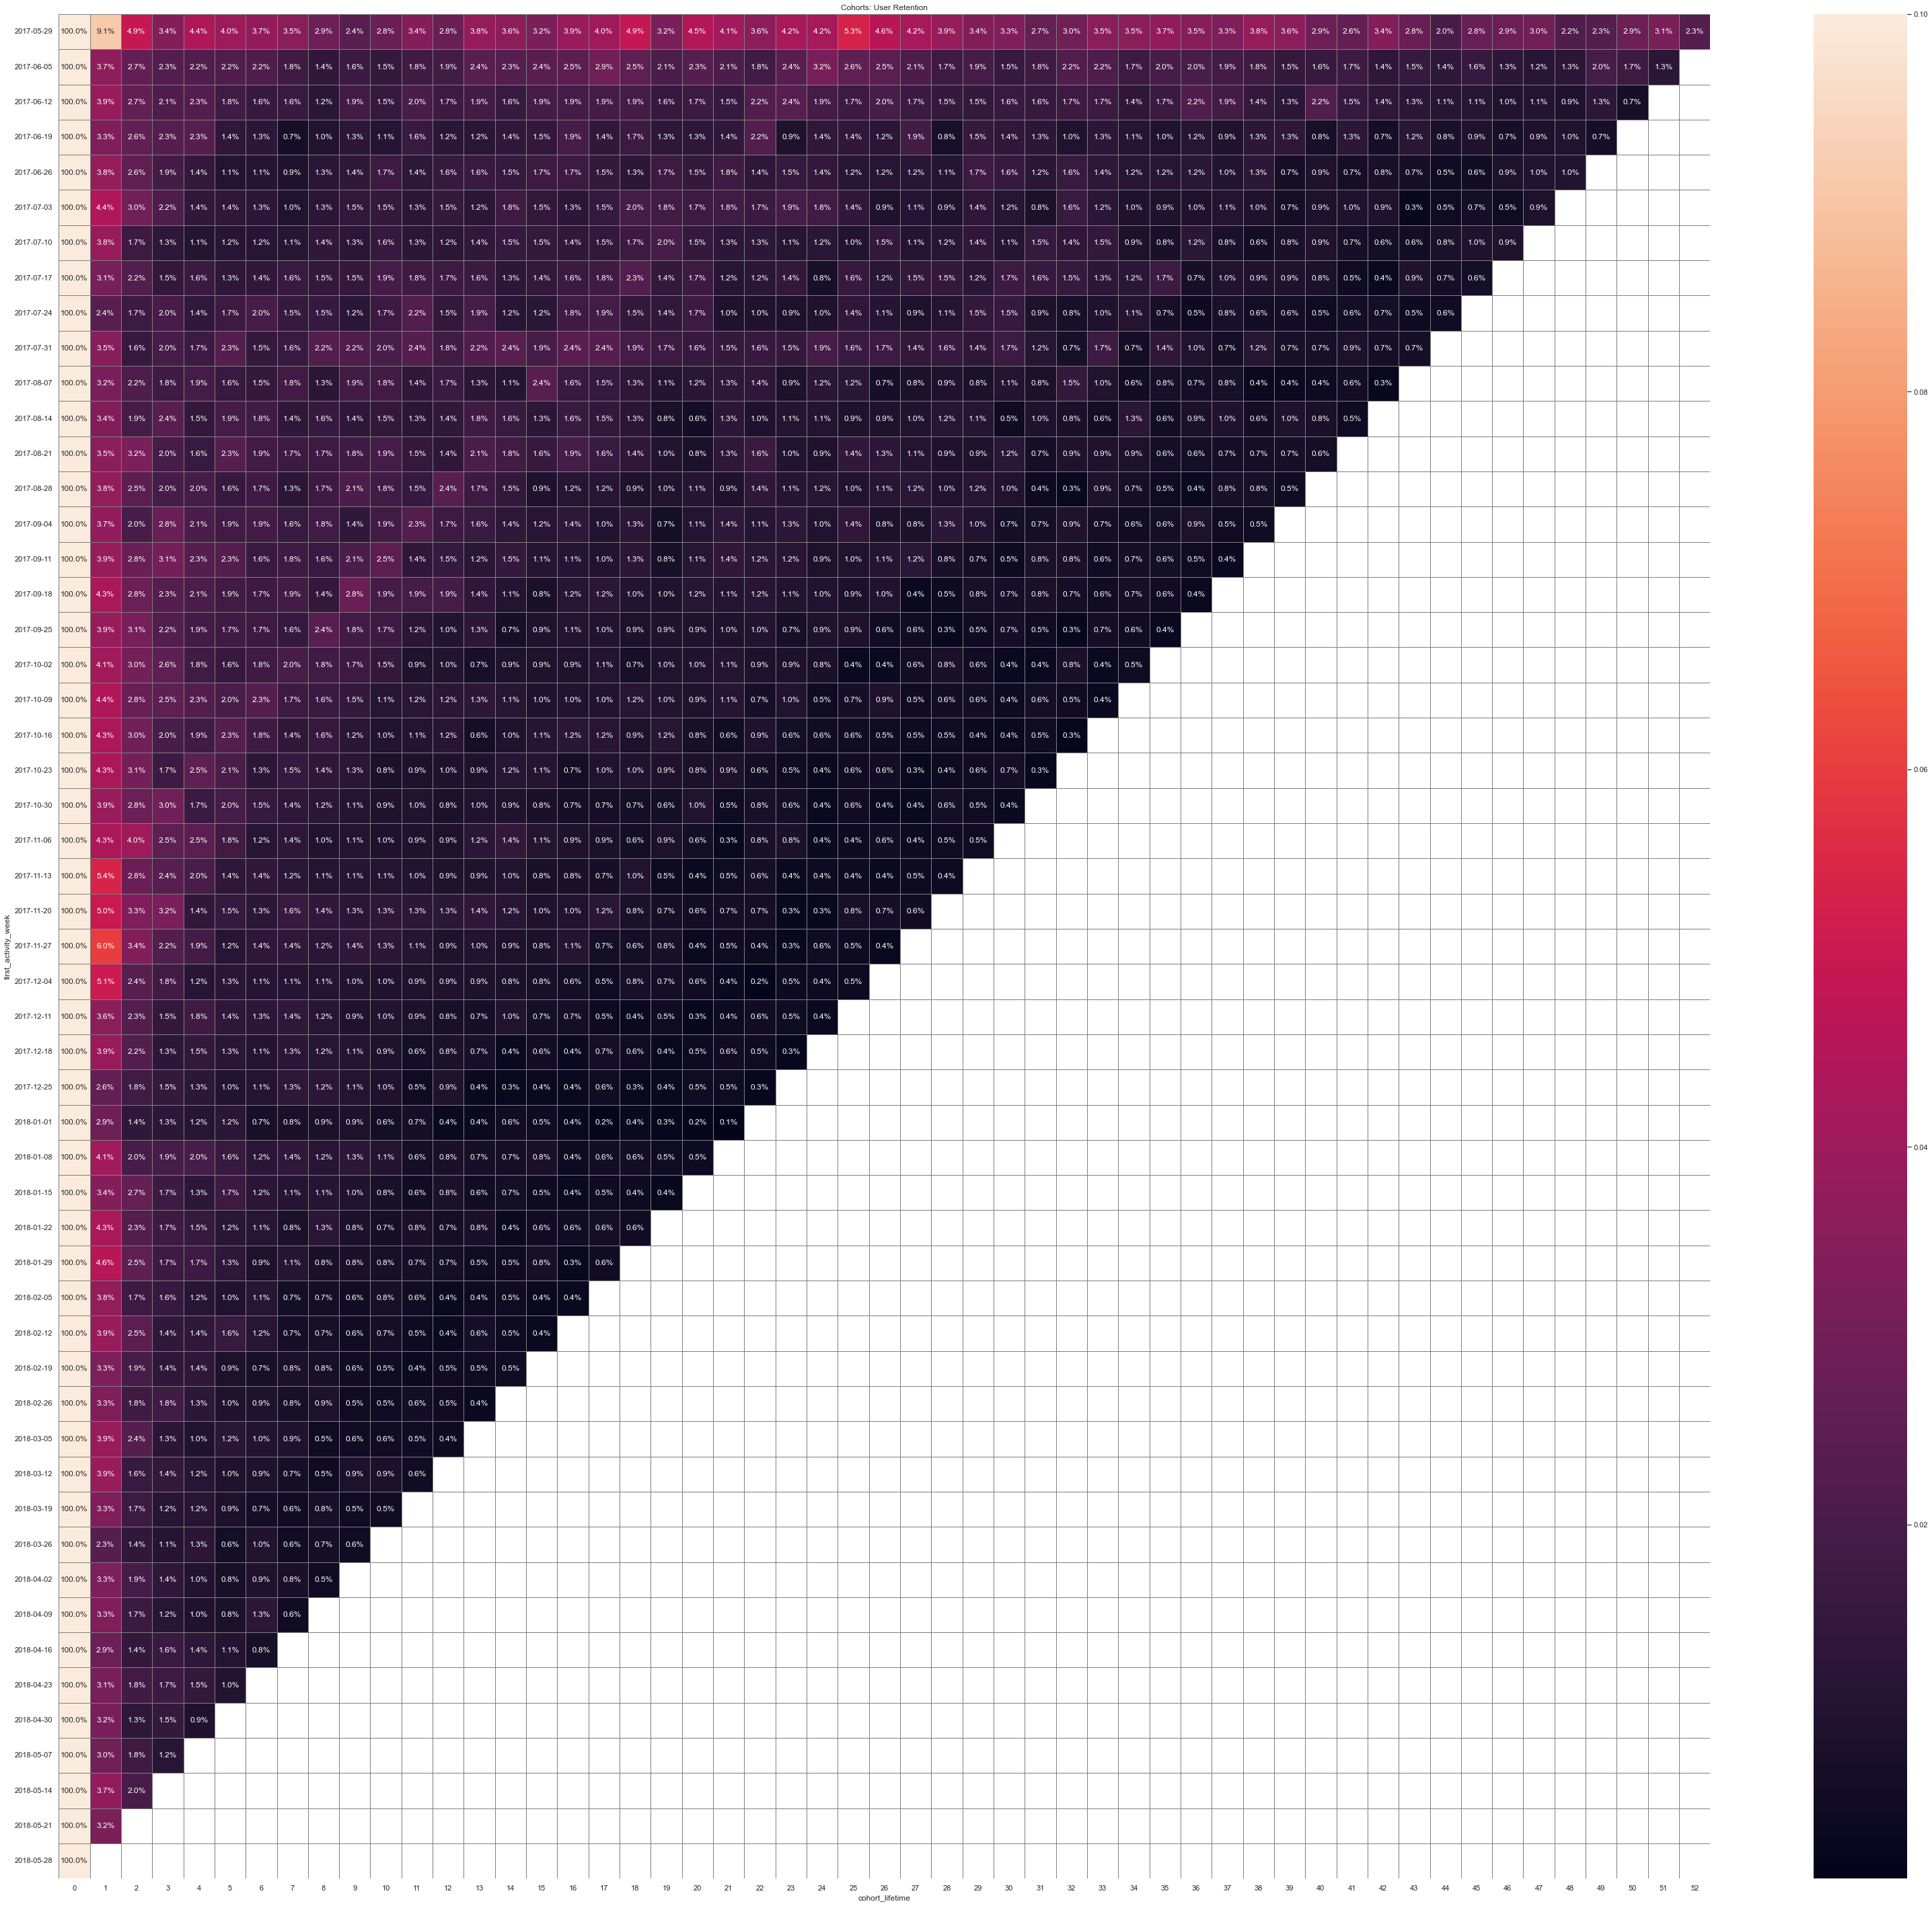

first_activity_week  cohort_lifetime   uid  cohort_users  retention
0             2017-05-29                0  1816          1816   1.000000
1             2017-05-29                1   166          1816   0.091410
2             2017-05-29                2    89          1816   0.049009
3             2017-05-29                3    62          1816   0.034141
4             2017-05-29                4    80          1816   0.044053
...                  ...              ...   ...           ...        ...
1426          2018-05-14                1   114          3050   0.037377
1427          2018-05-14                2    61          3050   0.020000
1428          2018-05-21                0  2986          2986   1.000000
1429          2018-05-21                1    96          2986   0.032150
1430          2018-05-28                0  3220          3220   1.000000

[1431 rows x 5 columns]

In [12]:
#creating the weekly columns
visits['activity_week'] = pd.to_datetime(
    visits['session_date'], unit='d'
) - pd.to_timedelta(visits['session_date'].dt.dayofweek, unit='d')

visits['first_activity_week'] = pd.to_datetime(
    visits['first_activity_date'], unit='d'
) - pd.to_timedelta(
    visits['first_activity_date'].dt.dayofweek, unit='d'
)

visits['cohort_lifetime'] = (
    visits['activity_week'] - visits['first_activity_week']
)
visits['cohort_lifetime'] = visits[
    'cohort_lifetime'
] / np.timedelta64(1, 'W')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype(int)

cohorts = (
    visits.groupby(['first_activity_week', 'cohort_lifetime'])
    .agg({'uid': 'nunique'})
    .reset_index()
) 
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_activity_week', 'uid']
]
initial_users_count = initial_users_count.rename(
    columns={'uid': 'cohort_users'}
) 
cohorts = cohorts.merge(initial_users_count, on='first_activity_week')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

cohorts['first_activity_week']=cohorts['first_activity_week'].dt.strftime('%Y-%m-%d')

retention_pivot = cohorts.pivot_table(
    index='first_activity_week',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)

sns.set(style='white')
plt.figure(figsize=(55, 51))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1
) 
plt.show()
cohorts

Retention rate per week is in decline sharply after the first week in all weeks.
It will also be helpful to see monthly activity of users 

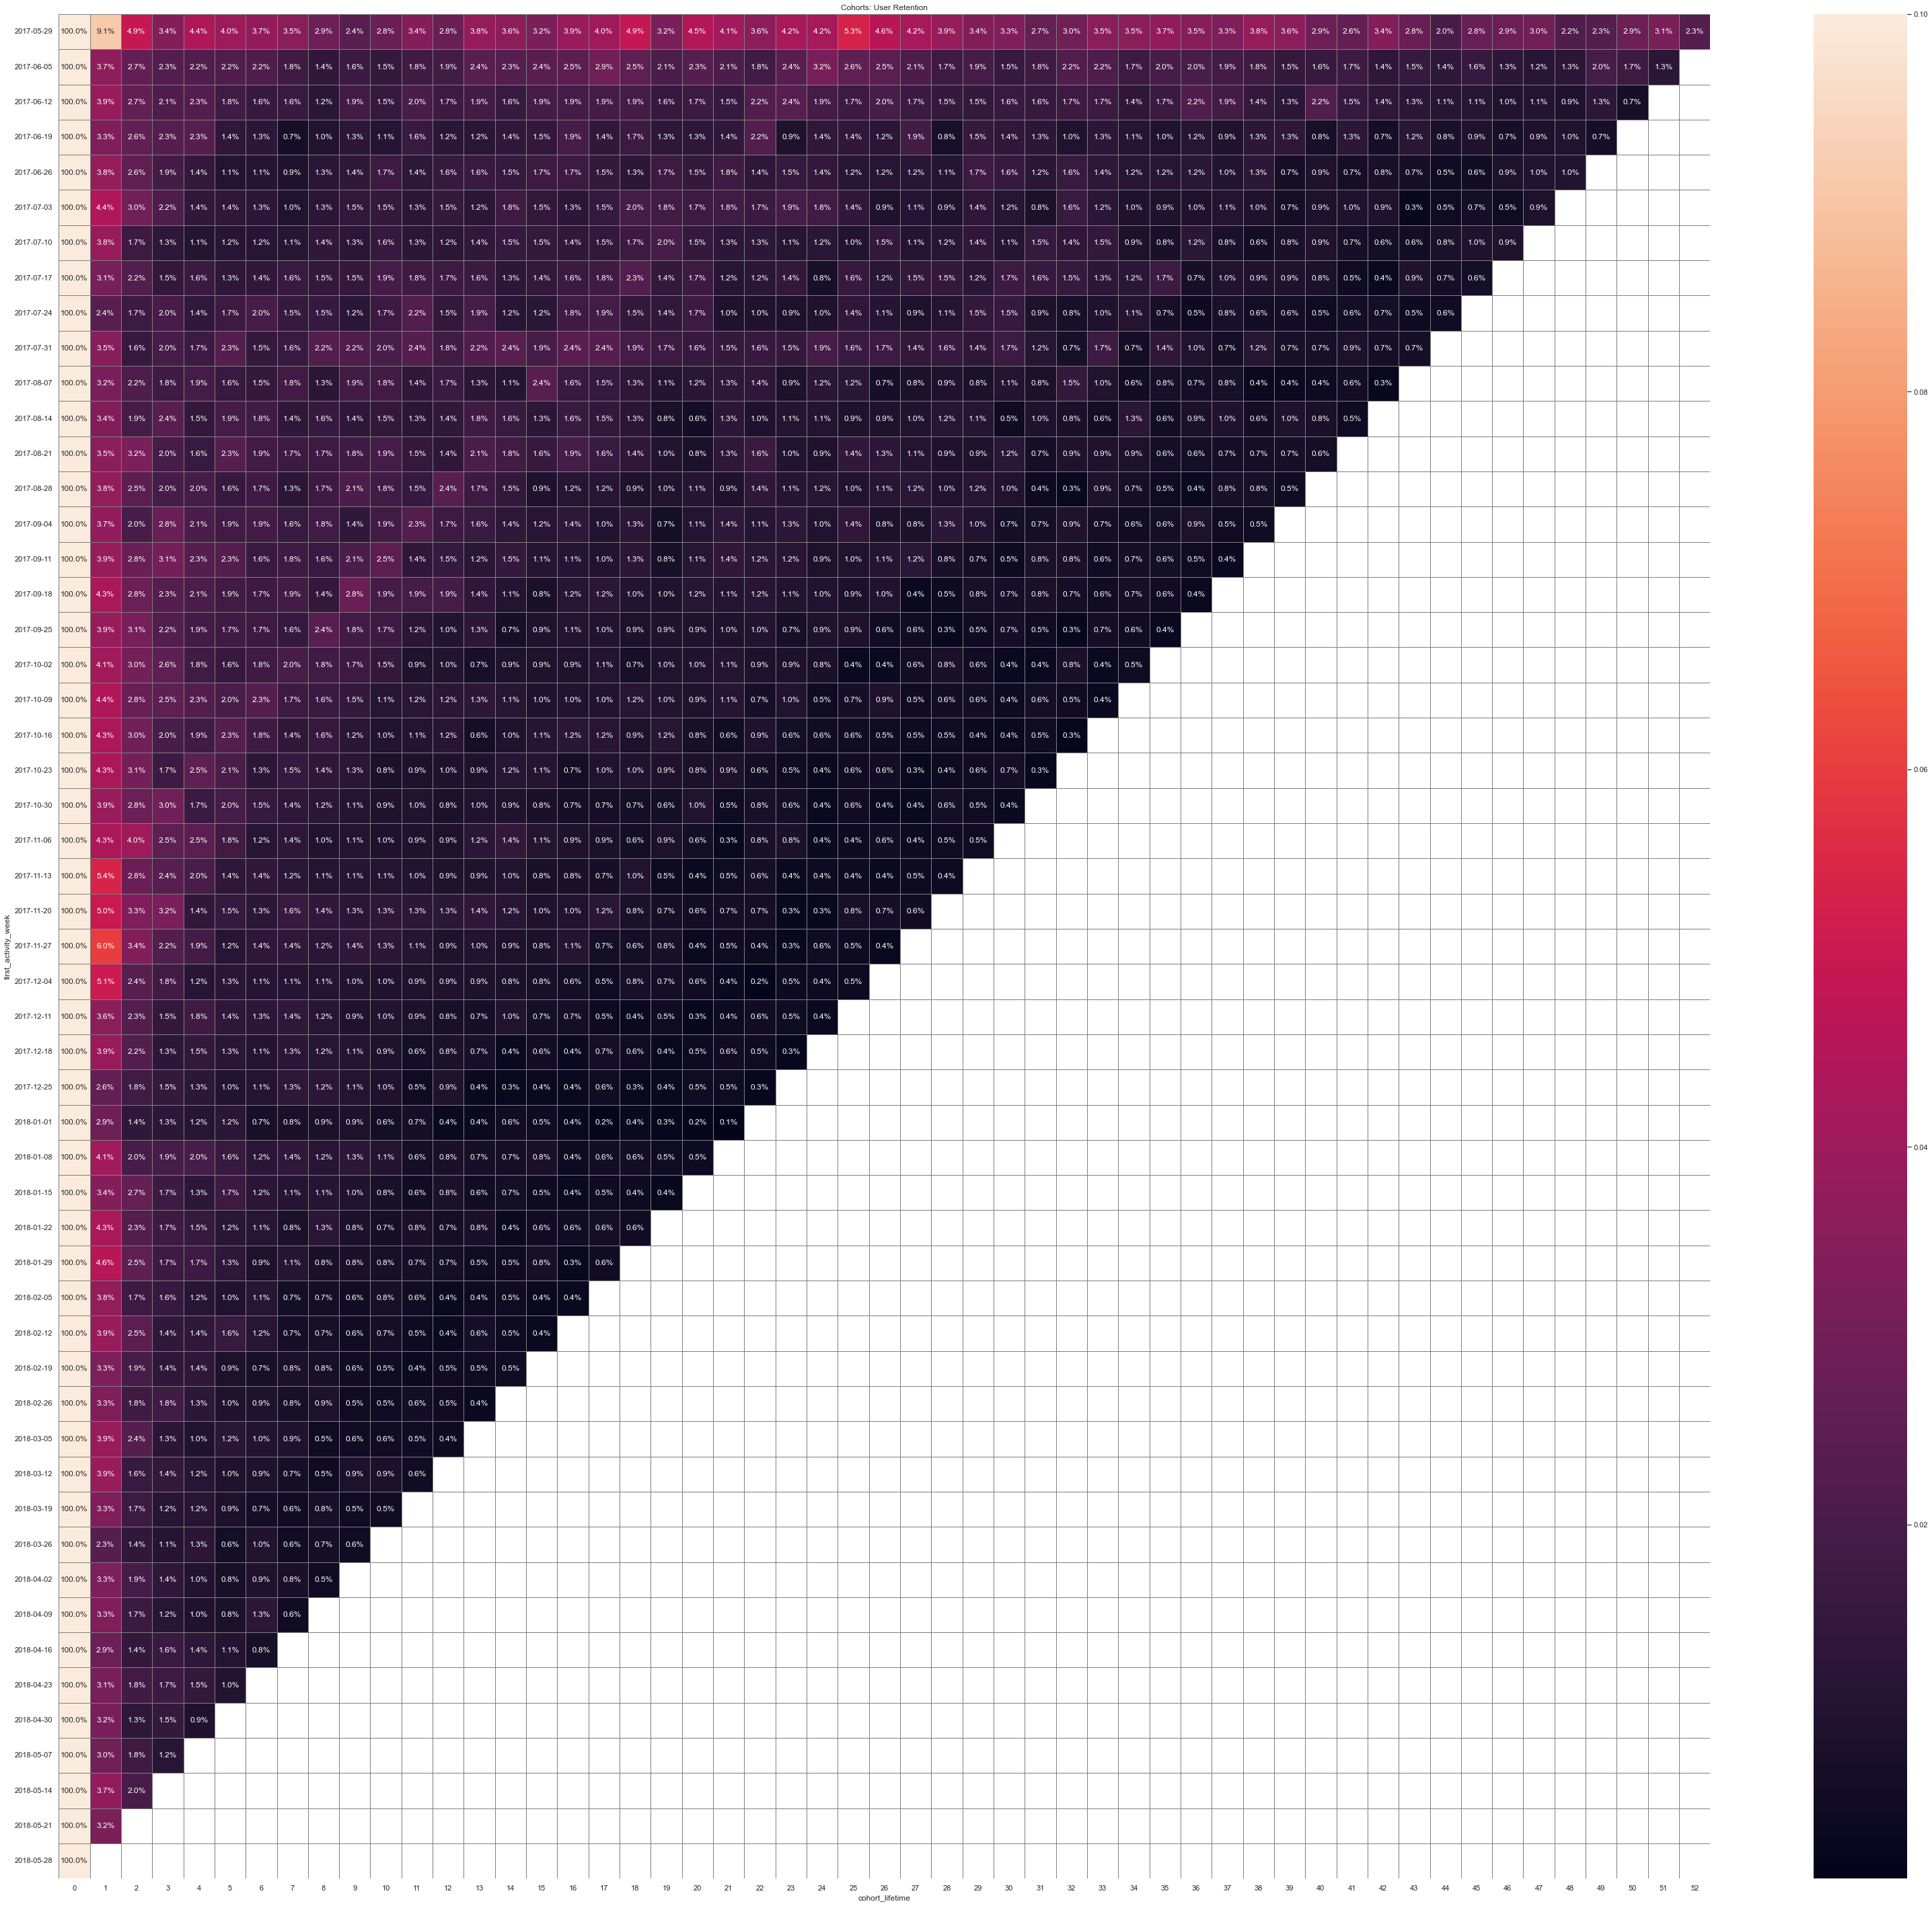

In [13]:
# the reviewer's cell:
#creating the weekly columns
visits['activity_week'] = pd.to_datetime(
    visits['session_date'], unit='d'
) - pd.to_timedelta(visits['session_date'].dt.dayofweek, unit='d')

visits['first_activity_week'] = pd.to_datetime(
    visits['first_activity_date'], unit='d'
) - pd.to_timedelta(
    visits['first_activity_date'].dt.dayofweek, unit='d'
)

visits['cohort_lifetime'] = (
    visits['activity_week'] - visits['first_activity_week']
)
visits['cohort_lifetime'] = visits[
    'cohort_lifetime'
] / np.timedelta64(1, 'W')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype(int)

cohorts = (
    visits.groupby(['first_activity_week', 'cohort_lifetime'])
    .agg({'uid': 'nunique'})
    .reset_index()
) 
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_activity_week', 'uid']
]
initial_users_count = initial_users_count.rename(
    columns={'uid': 'cohort_users'}
) 
cohorts = cohorts.merge(initial_users_count, on='first_activity_week')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

retention_pivot = cohorts.pivot_table(
    index='first_activity_week',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)

sns.set(style='white')
plt.figure(figsize=(55, 51))
plt.title('Cohorts: User Retention')
ax = sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1
) 
ax.set_yticklabels(retention_pivot.reset_index()['first_activity_week'].dt.strftime('%Y-%m-%d'))

plt.show()

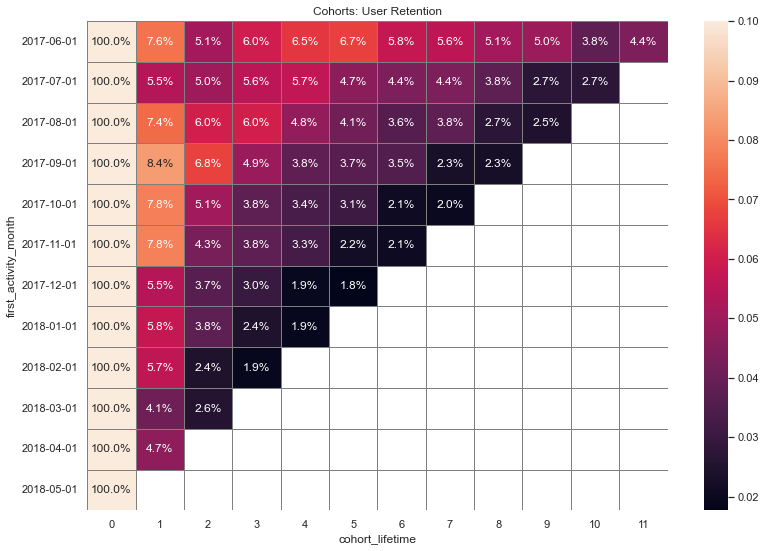

In [14]:


visits['first_activity_month'] = visits['first_activity_date'].astype(
    'datetime64[M]'
)

visits['activity_month'] = visits['session_date'].astype('datetime64[M]')

visits['cohort_lifetime'] = (
    visits['activity_month'] - visits['first_activity_month']
)

visits['cohort_lifetime'] = visits[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)

cohorts = (
    visits.groupby(['first_activity_month', 'cohort_lifetime'])
    .agg({'uid': 'nunique'})
    .reset_index()
) 

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_activity_month', 'uid']
]
initial_users_count = initial_users_count.rename(
    columns={'uid': 'cohort_users'}
) 

cohorts = cohorts.merge(initial_users_count, on='first_activity_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
cohorts['first_activity_month']=cohorts['first_activity_month'].dt.strftime('%Y-%m-%d')
retention_pivot=cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1
) 
plt.show()

We can also see in the monthly breakdown a big decline in users coming back in all months. The June cohort maintianed the best performance, as the retention rate was the highest then all other cohorts.

In conclusion for the product section we learned that there was a peak in user engagment in December but since then user engagment is going down, especially for the desktop users. We are also seeing higher session times for desktop users, maybe the mobile version shoud be improved. We can also see that the retention rates are low, maybe a discount or member program can make users stay on the platform fro longer?

## Sales

### When do people start buying? 

I will calculate the number of days passed between first activity date and first purchase date per user, and will create a new column 'category' to show the number of days.

In [15]:
first_purchase_date = orders.groupby('uid')['buy_ts'].min()
first_purchase_date.name = 'first_purchase_date'
visits=visits.join(first_purchase_date, on='uid')
visits['first_purchase_date']=visits['first_purchase_date'].dt.date
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid  session_year session_month session_week session_date  \
0  16879256277535980062          2017    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740          2018    2018-02-01   2018-02-15   2018-02-19   
3  16174680259334210214          2018    2018-05-01   2018-05-17   2018-05-20   
5  16007536194108375387          2017    2017-09-01   2017-08-31   2017-09-03   
6   6661610529277171451          2018    2018-01-01   2018-01-25   2018-01-30   

   session_duration_sec first_activity_date activity_week first_activity_week  \
0                1080.0          2017-12-20    2017-12-18          2017-12-18   
1                1680.0          2018-02-19    2018-02-19          2018-02-19   
3                1440.0          2018-03-09    2018-05-14          2018-03-05   
5                  60.0          2017-09-03    2017-08-28          2017-08-28   
6                3360.0          2017-06-29    2018-01-29          2017-06-26   

   cohort_lifetime first_activity_month activity_month first_purchase_date  
0                0           2017-12-01     2017-12-01                 NaT  
1                0           2018-02-01     2018-02-01                 NaT  
3                2           2018-03-01     2018-05-01          2018-03-09  
5                0           2017-09-01     2017-09-01          2017-09-04  
6                7           2017-06-01     2018-01-01                 NaT

Now I can subtract the columns to find the mean number of days between registration and first purchase

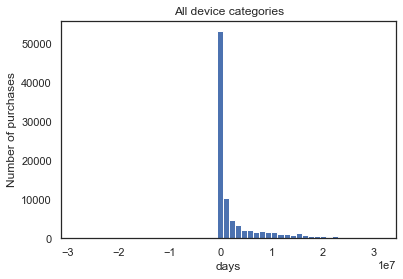

The median number of days between user registration and purchase is: 1 days 00:00:00


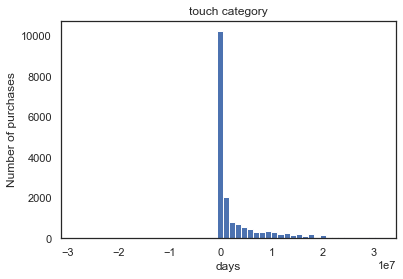

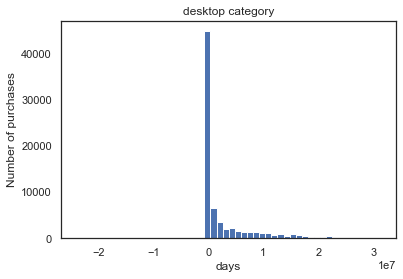

count                         91648
mean     32 days 05:38:12.423184357
std      62 days 20:10:41.618879848
min             -328 days +00:00:00
25%                 0 days 00:00:00
50%                 1 days 00:00:00
75%                33 days 00:00:00
max               363 days 00:00:00
Name: category, dtype: object

In [16]:
visits['category']=pd.to_datetime(visits['first_purchase_date']) - pd.to_datetime(visits['first_activity_date'])
ax=visits['category'].astype('timedelta64[s]').plot.hist(bins=50)
ax.set_ylabel('Number of purchases')
ax.set_xlabel('days')
ax.set_title('All device categories')
plt.show()
print('The median number of days between user registration and purchase is:', visits['category'].median())

#for touch category
ax=visits['category'].astype('timedelta64[s]').where(visits['device']=='touch').plot.hist(bins=50)
ax.set_ylabel('Number of purchases')
ax.set_xlabel('days')
ax.set_title('touch category')
plt.show()

#for desktop category
ax=visits['category'].astype('timedelta64[s]').where(visits['device']=='desktop').plot.hist(bins=50)
ax.set_ylabel('Number of purchases')
ax.set_xlabel('days')
ax.set_title('desktop category')
plt.show()

#checking negative values
visits['category'].describe()

The median number of days between user registration and purchase is 1 day. There is a small precentage of negative purchase date which might be an error in the logs, further investigation will be needed. Desktop number of purchases is 4 time larger then the touch category.

### How many orders do they make during a given period of time?

to check the amount of purchases, I will count the number of purchases and categorize it by month cohort.

In [17]:
first_order_dates = orders.groupby('uid')[
    'buy_ts'
].min()
first_order_dates.name = 'first_order_datetime'
orders = orders.join(first_order_dates, on='uid')
orders['order_month'] = orders['buy_ts'].astype(
    'datetime64[M]'
)
orders['first_order_month'] = orders[
    'first_order_datetime'
].astype('datetime64[M]')
cohort_stats = orders.groupby('first_order_month').agg({'uid': ['count', 'nunique']}).reset_index()
cohort_stats

first_order_month   uid        
                     count nunique
0         2017-06-01  4430    2022
1         2017-07-01  2909    1922
2         2017-08-01  2187    1369
3         2017-09-01  3873    2579
4         2017-10-01  6005    4340
5         2017-11-01  5878    4078
6         2017-12-01  5890    4380
7         2018-01-01  4308    3373
8         2018-02-01  4469    3651
9         2018-03-01  4485    3534
10        2018-04-01  2682    2274
11        2018-05-01  3247    2986

We can see that October, November and December are the strongs months in terms of number of purchases. July and April in contrast are the weakest. In June the number of purchases was double then the number of users at that month, which is intersting and maybe corrolated to the stronger retention rate in this month we found above.

### What is the average purchase size?

In [19]:
orders_grouped_by_cohorts = orders.groupby(
    ['first_order_month']
).agg({'revenue': ['sum', 'count']}).reset_index()
avg_purchase_size=orders_grouped_by_cohorts['revenue']['sum']/orders_grouped_by_cohorts['revenue']['count']
orders_grouped_by_cohorts=orders_grouped_by_cohorts.merge(avg_purchase_size.rename('avg_purchase_size').to_frame(),left_index=True, right_index=True)
orders_grouped_by_cohorts

C:\Users\edeng\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


(first_order_month, )  (revenue, sum)  (revenue, count)  avg_purchase_size
0             2017-06-01        24030.25              4430           5.424436
1             2017-07-01        16127.92              2909           5.544146
2             2017-08-01        11606.26              2187           5.306932
3             2017-09-01        34672.72              3873           8.952419
4             2017-10-01        27603.45              6005           4.596744
5             2017-11-01        26098.77              5878           4.440077
6             2017-12-01        33490.11              5890           5.685927
7             2018-01-01        16663.13              4308           3.867950
8             2018-02-01        16750.50              4469           3.748154
9             2018-03-01        19274.30              4485           4.297503
10            2018-04-01        11810.61              2682           4.403658
11            2018-05-01        13925.76              3247           4.288808

We can see the average purchase size for each cohort. September was where the largest average purchase size was reached at close to 9, whereas February was the lowest. 

### How much money do they bring? (LTV)

The total amount of money a customer brings to the company on average by making purchases. When calculating LTV, analysts usually consider the gross profit from a customer per period. As it's not mentioned if the profit is gross or not, I am assuming it is.

In [20]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]')

first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

orders_ = pd.merge(orders,first_orders, on='uid')
orders_.drop('first_order_month_y', axis=1, inplace=True)
orders_.rename(columns={'first_order_month_x' : 'first_order_month' } ,inplace=True)

cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')


report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['revenue'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis=1).round(2)

output.fillna('') 

age                  0     1     2      3      4      5      6      7      8   \
first_order_month                                                               
2017-06-01         4.73  5.21  5.65   6.61   7.63   8.36   9.31    9.9  10.45   
2017-07-01         6.01  6.35  6.97   7.33   7.51   7.66   7.79   7.93   8.09   
2017-08-01         5.28  5.75  6.21    6.6    7.1   7.38   7.59    8.0   8.29   
2017-09-01         5.65  6.77  7.29  11.27  11.67  12.31  13.02  13.26  13.44   
2017-10-01         5.00  5.54  5.73   5.89   6.04   6.16   6.24   6.36          
2017-11-01         5.16  5.56  5.76   6.08   6.23   6.28    6.4                 
2017-12-01         4.74   5.0  5.93   6.99   7.31   7.65                        
2018-01-01         4.14  4.43  4.73   4.88   4.94                               
2018-02-01         4.16  4.44  4.51   4.59                                      
2018-03-01         4.84  5.14  5.45                                             
2018-04-01         4.66  5.19                                                   
2018-05-01         4.66                                                         

age                   9      10     11  
first_order_month                       
2017-06-01         11.06  11.63  11.88  
2017-07-01          8.24   8.39         
2017-08-01          8.48                
2017-09-01                              
2017-10-01                              
2017-11-01                              
2017-12-01                              
2018-01-01                              
2018-02-01                              
2018-03-01                              
2018-04-01                              
2018-05-01

We see clearly for which cohorts revenue per user increased in the months following the month of first purchase. in all cohorts the revenue increased, but the June and September are the strongest which correlate with the number of purchases per user we found above.

In conclusion for sales part, we checked and see that the conversion average is 1 day, and that Desktop number of purchases is 4 time larger then the touch category. We also seen that October, November and December are the strongest months in terms of number of purchases per user. September also was where the largest average purchase size was reached. We also seen that LTV increased in each monthly cohorts and that June and September has the best performance.

## Marketing

### How much money was spent? Overall/per source/over time

In [22]:
#overall costs
overall=costs.groupby('source_id')['costs'].sum()
overall.sum()

329131.61999999994

In [23]:
#overall costs per source
costs_per_source_id=costs.groupby('source_id')['costs'].sum()
costs_per_source_id

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [24]:
#overall costs per source over time
spent_per_source = costs.groupby('source_id')[
    'costs'
].sum()
spent_per_source.name = 'spent_per_source'
costs = costs.join(spent_per_source, on='source_id')

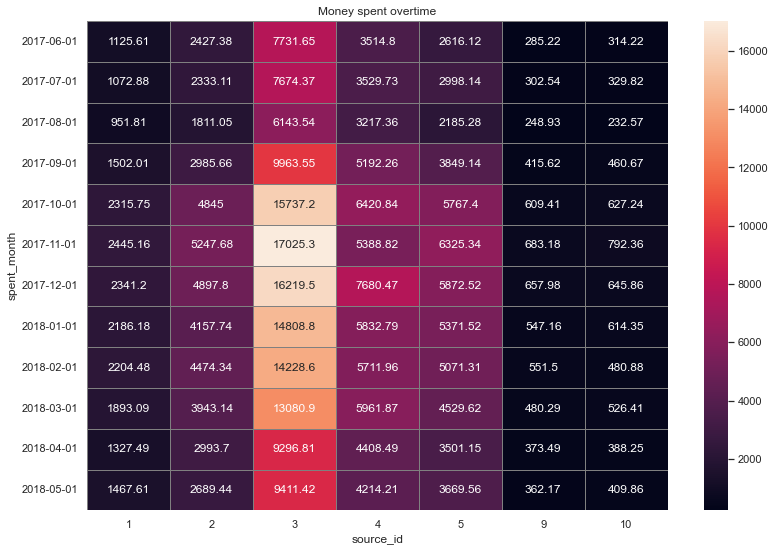

In [25]:


costs['spent_month'] = costs['dt'].astype('datetime64[M]')
costs['spent_month']=costs['spent_month'].dt.strftime('%Y-%m-%d')
costs['month']=costs['month'].dt.strftime('%Y-%m-%d')
visits['first_activity_month']=visits['first_activity_month'].dt.strftime('%Y-%m-%d')
report['first_order_month']=report['first_order_month'].dt.strftime('%Y-%m-%d')
costs_pivot=costs.pivot_table(
    index='spent_month',
    columns='source_id',
    values='costs',
    aggfunc='sum',
) 

sns.set()
plt.figure(figsize=(13, 9))
plt.title('Money spent overtime')
sns.heatmap(
    costs_pivot, annot=True, fmt='g', linewidths=1, linecolor='gray'
) 
plt.show()

We can see that source_id 3 has the largest amount of money spent on where November was the largest month.

### How much did customer acquisition from each of the sources cost?

In [26]:
#checking the original source the user came from
first_source=visits.sort_values('session_date').groupby('uid').first()['source_id'].reset_index()
first_source.columns=['uid', 'first_source']
first_source

uid  first_source
0             11863502262781             3
1             49537067089222             2
2            297729379853735             3
3            313578113262317             2
4            325320750514679             5
...                      ...           ...
207039  18446316582013423015             3
207040  18446403737806311543             5
207041  18446556406699109058             3
207042  18446621818809592527             4
207043  18446676030785672386             3

[207044 rows x 2 columns]

In [27]:
orders=orders.merge(first_source, on='uid')
marketing_by_month_source=costs.groupby(['month', 'source_id'])['costs'].sum().reset_index()
marketing_by_month_source=marketing_by_month_source.rename(columns={'month' : 'cost_month', 'source_id' : 'source'})
marketing_by_month_source

cost_month  source    costs
0   2017-06-01       1  1125.61
1   2017-06-01       2  2427.38
2   2017-06-01       3  7731.65
3   2017-06-01       4  3514.80
4   2017-06-01       5  2616.12
..         ...     ...      ...
79  2018-05-01       3  9411.42
80  2018-05-01       4  4214.21
81  2018-05-01       5  3669.56
82  2018-05-01       9   362.17
83  2018-05-01      10   409.86

[84 rows x 3 columns]

In [28]:
buyers_per_month_source=orders.groupby(['first_order_month', 'first_source'])['uid'].nunique().reset_index()
buyers_per_month_source.columns=['cost_month', 'source', 'buyers']
buyers_per_month_source

cost_month  source  buyers
0  2017-06-01       1     210
1  2017-06-01       2     238
2  2017-06-01       3     608
3  2017-06-01       4     402
4  2017-06-01       5     388
..        ...     ...     ...
80 2018-05-01       3     793
81 2018-05-01       4     766
82 2018-05-01       5     501
83 2018-05-01       9      59
84 2018-05-01      10     124

[85 rows x 3 columns]

In [29]:
buyers_per_month_source['cost_month']=buyers_per_month_source['cost_month'].dt.strftime('%Y-%m-%d')
cac_per_month_source=marketing_by_month_source.merge(buyers_per_month_source,how='left',on=['cost_month', 'source'])
cac_per_month_source['CAC']=cac_per_month_source['costs']/cac_per_month_source['buyers']
cac_per_month_source

cost_month  source    costs  buyers        CAC
0   2017-06-01       1  1125.61     210   5.360048
1   2017-06-01       2  2427.38     238  10.199076
2   2017-06-01       3  7731.65     608  12.716530
3   2017-06-01       4  3514.80     402   8.743284
4   2017-06-01       5  2616.12     388   6.742577
..         ...     ...      ...     ...        ...
79  2018-05-01       3  9411.42     793  11.868121
80  2018-05-01       4  4214.21     766   5.501580
81  2018-05-01       5  3669.56     501   7.324471
82  2018-05-01       9   362.17      59   6.138475
83  2018-05-01      10   409.86     124   3.305323

[84 rows x 5 columns]

In [30]:
fig=px.line(cac_per_month_source, x='cost_month', y='CAC', color='source', title='CAC')
fig.show()

In [31]:
cac_per_month_source.pivot_table(
    index='cost_month', columns='source', values='CAC', aggfunc='sum'
)

source            1          2          3         4         5         9   \
cost_month                                                                 
2017-06-01  5.360048  10.199076  12.716530  8.743284  6.742577  4.321515   
2017-07-01  5.501949  11.381024  15.921929  7.102072  7.104597  5.932157   
2017-08-01  7.931750  14.844672  18.338925  9.809024  6.155718  4.148833   
2017-09-01  5.667962  12.924935  13.667421  9.321831  6.415233  4.947857   
2017-10-01  5.760572  12.455013  14.424601  5.707413  6.032845  4.995164   
2017-11-01  6.143618  13.021538  14.778941  4.777323  8.997639  5.023382   
2017-12-01  5.957252  12.558462  12.923920  5.871919  7.519232  5.576102   
2018-01-01  7.780000  14.046419  15.571798  5.921614  8.276610  6.672683   
2018-02-01  6.867539  14.669967  13.881522  5.383563  7.349725  6.488235   
2018-03-01  6.067596  11.462616  14.296011  5.827830  8.357232  3.078782   
2018-04-01  6.412995  13.607727  16.001394  6.720259  7.975285  9.828684   
2018-05-01  5.167641   6.511961  11.868121  5.501580  7.324471  6.138475   

source            10  
cost_month            
2017-06-01  3.491333  
2017-07-01  6.596400  
2017-08-01  6.285676  
2017-09-01  5.419647  
2017-10-01  3.074706  
2017-11-01  6.441951  
2017-12-01  7.876341  
2018-01-01  7.061494  
2018-02-01  4.041008  
2018-03-01  2.876557  
2018-04-01  3.844059  
2018-05-01  3.305323

### How worthwhile where the investments? (ROI)

In [32]:
ltv_per_source=orders.groupby('first_source')['uid', 'revenue'].agg({'uid': 'nunique', 'revenue':'sum'}).reset_index()
ltv_per_source.columns=['source','buyers','revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers']
ltv_per_source


C:\Users\edeng\AppData\Local\Temp/ipykernel_8796/2268341388.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



source  buyers   revenue        ltv
0       1    3388  31908.70   9.418152
1       2    3556  47054.63  13.232461
2       3    9917  51248.66   5.167758
3       4    9836  54357.40   5.526373
4       5    7026  55528.47   7.903284
5       7       1      1.22   1.220000
6       9    1057   5506.65   5.209697
7      10    1285   4568.21   3.555027

In [33]:
roi_per_source=marketing_by_month_source.merge(ltv_per_source,on=['source'])


In [34]:
tmp=orders.groupby(['first_source','first_order_month']).agg({'revenue':'sum'}).reset_index()
tmp.columns=['source','first_order_month','revenue']
tmp = cac_per_month_source.merge(tmp,on=['source'])
tmp['ltv']=tmp['revenue']/tmp['buyers']
tmp['cac']=tmp['costs']/tmp['buyers']
tmp['romi']=tmp['ltv']/tmp['cac']
tmp.groupby('source').agg({'cac' : 'mean'})

cac
source           
1        6.218243
2       12.306951
3       14.532593
4        6.723976
5        7.354264
9        5.595989
10       5.026208

In [35]:
fig=px.bar(tmp.groupby('source').agg({'romi' : 'mean'}).reset_index(), x='source', y='romi')
fig.update_xaxes(type='category')
fig.show()

In [38]:
cost_dict=roi_per_source.groupby('cost_month')['costs'].sum().to_dict()


We can see that source 3 has the lowest romi so it can be recommended that this source will be dropped out and the money invested in other sources ids.

In [37]:
report['costs']=report['first_order_month'].map(cost_dict)
report['cac']=report['costs']/report['n_buyers']
report['romi']=report['ltv']/report['cac']
report.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(2)

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.53  0.59  0.63  0.74  0.86  0.94  1.05  1.11  1.17  1.24   
2017-07-01         0.63  0.67  0.73  0.77  0.79  0.81  0.82  0.84  0.85  0.87   
2017-08-01         0.49  0.53  0.57  0.61  0.66  0.68  0.70  0.74  0.77  0.78   
2017-09-01         0.60  0.72  0.77  1.19  1.23  1.30  1.38  1.40  1.42   NaN   
2017-10-01         0.60  0.66  0.68  0.70  0.72  0.74  0.75  0.76   NaN   NaN   
2017-11-01         0.56  0.60  0.62  0.65  0.67  0.68  0.69   NaN   NaN   NaN   
2017-12-01         0.54  0.57  0.68  0.80  0.84  0.87   NaN   NaN   NaN   NaN   
2018-01-01         0.42  0.45  0.48  0.49  0.50   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.46  0.49  0.50  0.51   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         0.56  0.60  0.63   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.48  0.53   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05-01         0.63   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

age                  10    11  
first_order_month              
2017-06-01         1.31  1.33  
2017-07-01         0.88   NaN  
2017-08-01          NaN   NaN  
2017-09-01          NaN   NaN  
2017-10-01          NaN   NaN  
2017-11-01          NaN   NaN  
2017-12-01          NaN   NaN  
2018-01-01          NaN   NaN  
2018-02-01          NaN   NaN  
2018-03-01          NaN   NaN  
2018-04-01          NaN   NaN  
2018-05-01          NaN   NaN

## Conclusion

In conclusion I have inspected how many people use the products every day, week, and month;
how many sessions are there per day; and what is the length of each session per device. 

In the product section we learned that there was a peak in user engagment in December but since then user engagment is going down, especially for the desktop users. We are also seeing higher session times for desktop users, maybe the mobile version should be improved. We can also see that the retention rates are low, maybe a discount or member program can make users stay on the platform fro longer? After the user first use the product, he usually don't come back.

In sales part, we checked and see that the conversion average is 1 day, and that Desktop number of purchases is 4 time larger then the touch category. We also seen that October, November and December are the strongest months in terms of number of purchases per user. September also was where the largest average purchase size was reached. We also seen that LTV increased in each monthly cohorts and that June and September has the best performance.

We also saw that source id 3 is the most expensive source id, and has the lowest romi, my recommendation is to avoid investing in this source id and distribute the funds between the remaining source ids.

Finally we saw the that Septmber cohort of romi is the strongst overall while June cohort is the second strongest, and January is the weakest cohort month in terms of romi.